In [19]:
with open("./data/5.9.0005e-06_threshold_results.txt", 'r') as f:
   results = eval(f.readline())

print(results)

[('correlated_signal_attack_1.log', (0.9418705375892482, 0.0, 0.0, 0, [[0, 2343], [2086, 71763]])), ('correlated_signal_attack_2.log', (0.9291136141038198, 0.31590607000443066, 1.0, 0.48013468013468014, [[2139, 4632], [0, 58573]])), ('correlated_signal_attack_3.log', (0.9306122448979591, 0.31709766507657544, 1.0, 0.4815097216927182, [[1263, 2720], [0, 35217]])), ('fuzzing_attack_1.log', (0.9804385964912281, 0.002325581395348837, 0.05555555555555555, 0.004464285714285714, [[2, 858], [34, 44706]])), ('fuzzing_attack_2.log', (0.9635810810810811, 0.002806361085126286, 0.2, 0.005535055350553506, [[3, 1066], [12, 28519]])), ('fuzzing_attack_3.log', (0.95, 0.001669449081803005, 0.3333333333333333, 0.003322259136212625, [[1, 598], [2, 11399]])), ('max_engine_coolant_temp_attack.log', (0.9706988134657837, 0.0, 0.0, 0, [[0, 1657], [42, 56285]])), ('max_speedometer_attack_1.log', (0.9696447136916186, 0.0, 0.0, 0, [[0, 3629], [2444, 193991]])), ('max_speedometer_attack_2.log', (0.9591615996258185,

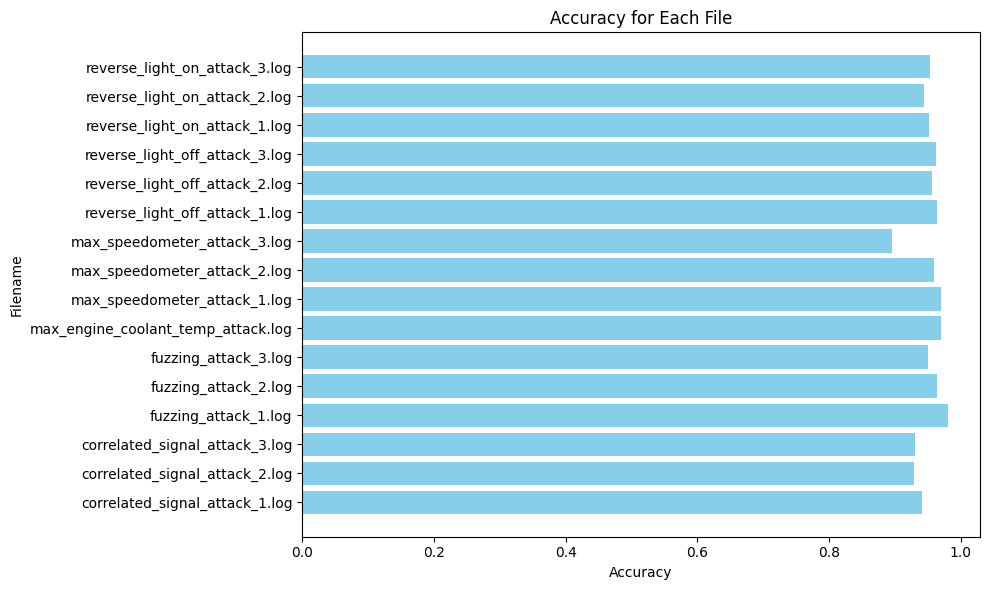

In [20]:
import matplotlib.pyplot as plt

#"results" is a list of tuples in the format ('filename', (accuracy, precision, recall, f1_score, confusion_matrix))
filenames = [result[0] for result in results]
accuracies = [result[1][0] for result in results]

#Plotting using horizontal bars
plt.figure(figsize=(10, 6))
plt.barh(filenames, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.ylabel('Filename')
plt.title('Accuracy for Each File')
plt.tight_layout()
plt.show()


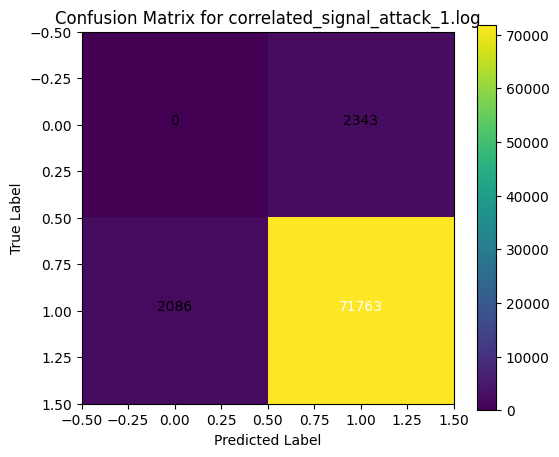

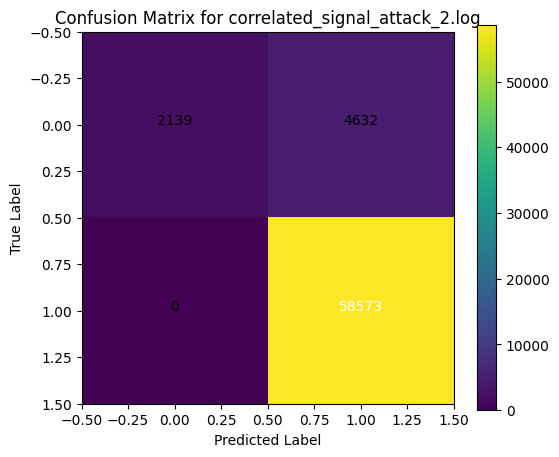

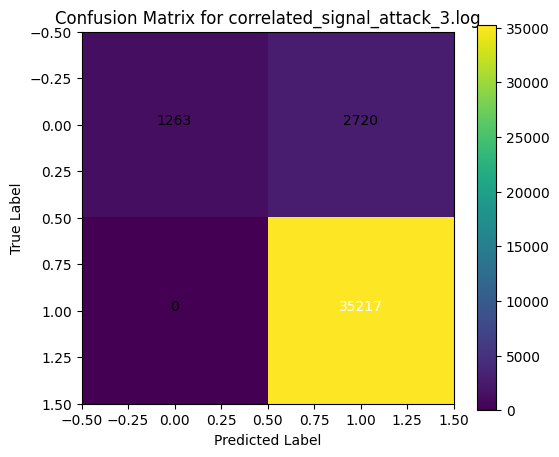

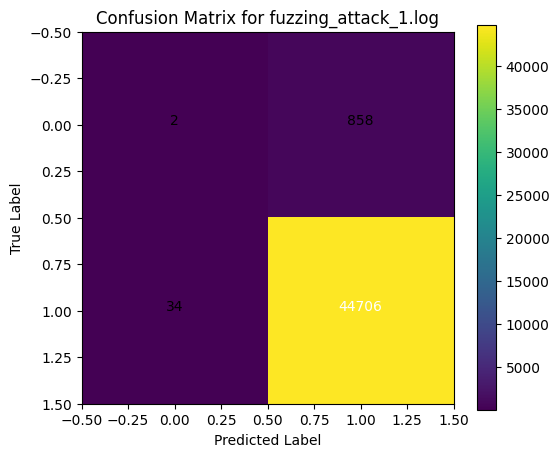

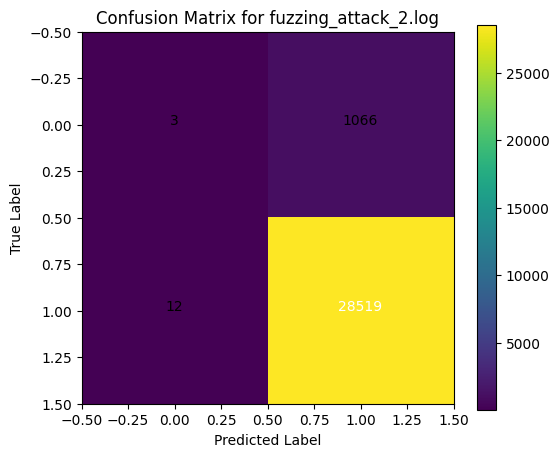

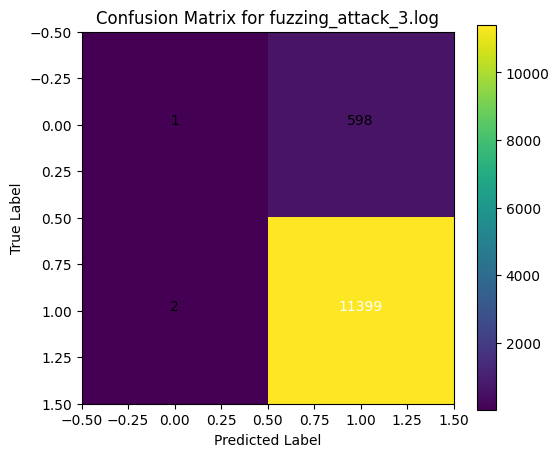

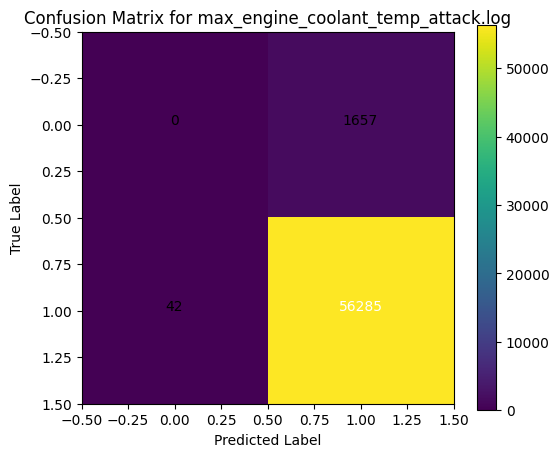

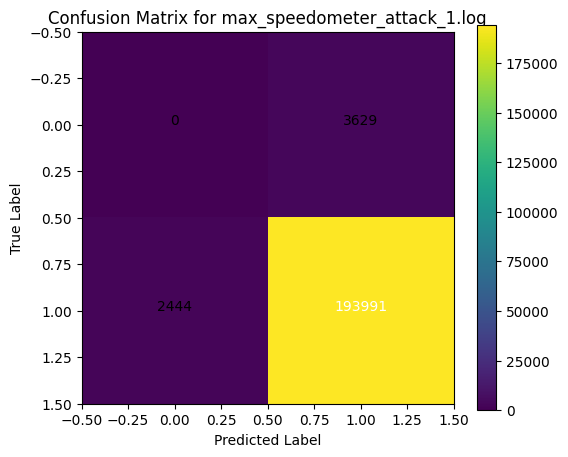

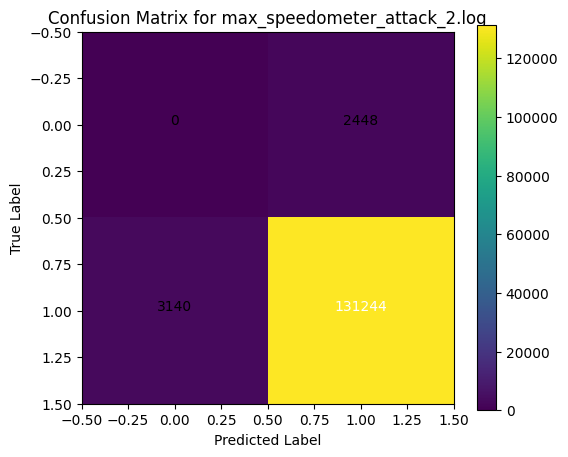

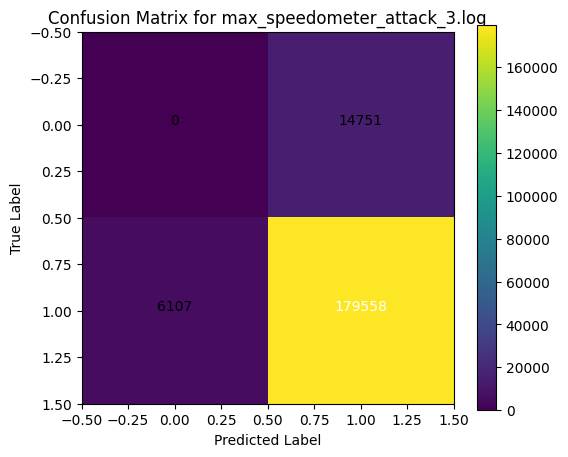

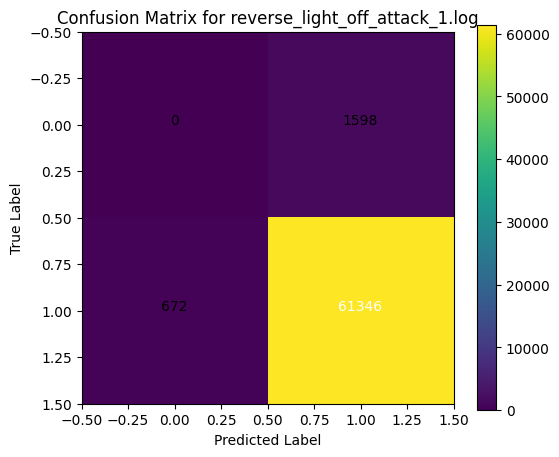

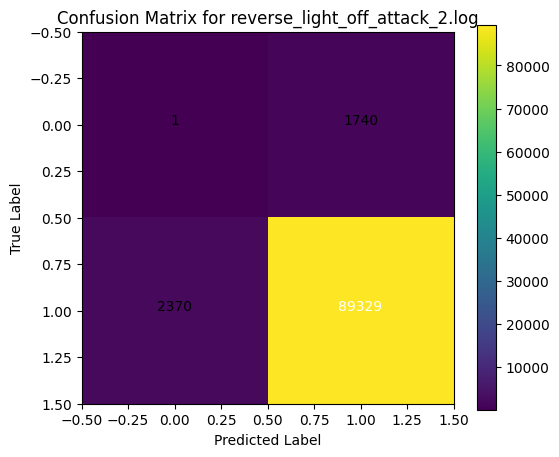

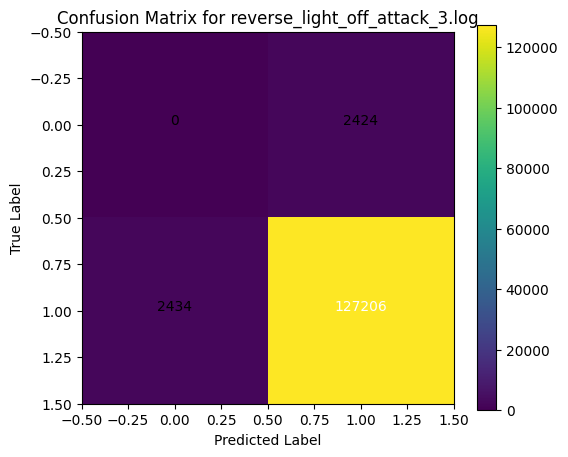

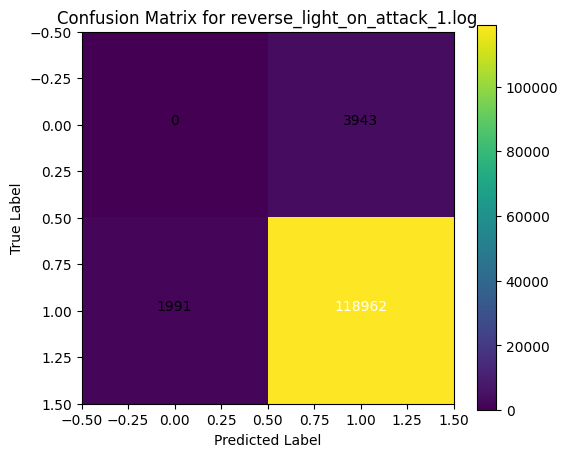

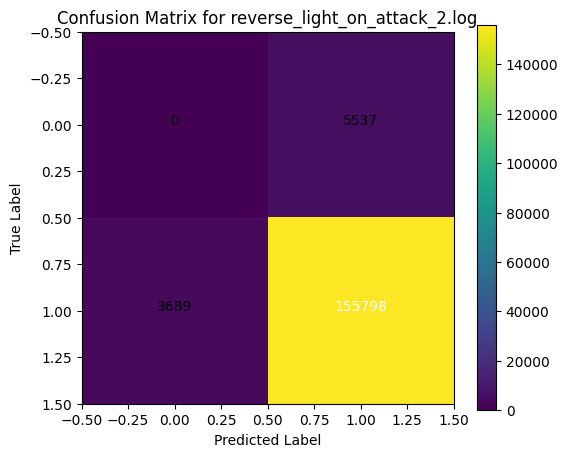

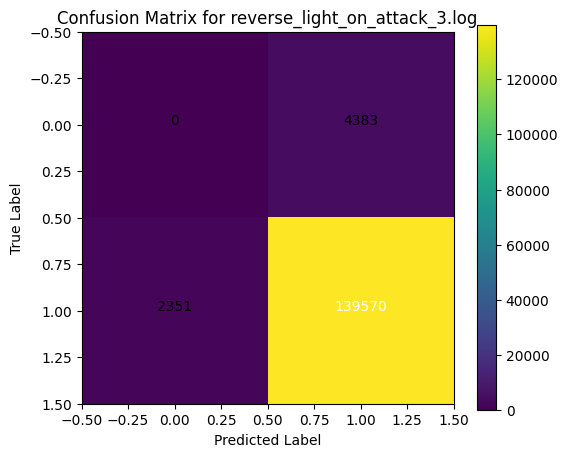

In [26]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

for file_data in results:
    filename, metrics = file_data
    confusion_matrix = metrics[4]  # Assuming the confusion matrix is the 5th element in the tuple
    matrix_max = max(max(row) for row in confusion_matrix)  # Find max in nested list

    plt.figure(figsize=(6, 5))
    plt.imshow(confusion_matrix, interpolation='nearest', cmap='viridis')
    plt.title(f'Confusion Matrix for {filename}')
    plt.colorbar()

    # Annotate the heatmap
    for i in range(len(confusion_matrix)):
        for j in range(len(confusion_matrix[i])):
            plt.text(j, i, format(confusion_matrix[i][j], 'd'),
                     horizontalalignment="center",
                     color="white" if confusion_matrix[i][j] > matrix_max / 2 else "black")

    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()



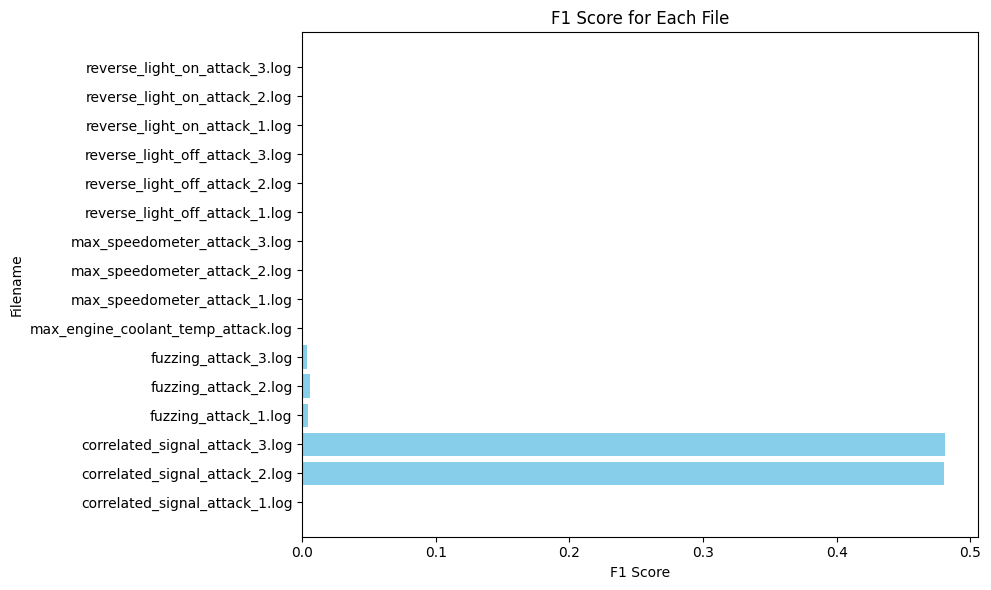

In [22]:
import matplotlib.pyplot as plt

#"results" is a list of tuples in the format ('filename', (accuracy, precision, recall, f1_score, confusion_matrix))
filenames = [result[0] for result in results]
F1s = [result[1][3] for result in results]

# Plotting using horizontal bars
plt.figure(figsize=(10, 6))
plt.barh(filenames, F1s, color='skyblue')
plt.xlabel('F1 Score')
plt.ylabel('Filename')
plt.title('F1 Score for Each File')
plt.tight_layout()
plt.show()

The following table is really ugly, but I can put it into excel or word or something if we want to use it for the report

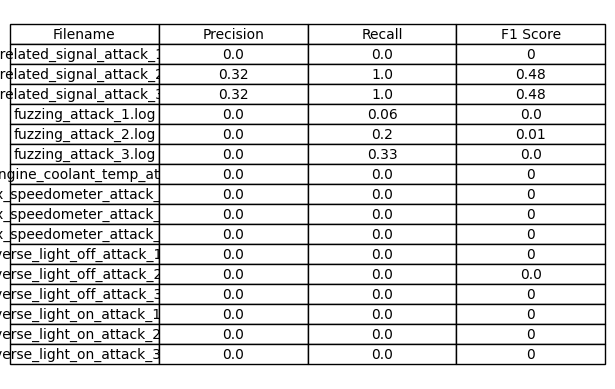

In [24]:
import matplotlib.pyplot as plt

#data extraction and round to 2 decimal places
filenames = [result[0] for result in results]
precisions = [round(result[1][1], 2) for result in results]
recalls = [round(result[1][2], 2) for result in results]
f1_scores = [round(result[1][3], 2) for result in results]

data = list(zip(filenames, precisions, recalls, f1_scores))

fig, ax = plt.subplots()
ax.axis('off')
ax.axis('tight')

#text size can be adjusted here
text_size = 10

table = ax.table(cellText=data, colLabels=['Filename', 'Precision', 'Recall', 'F1 Score'], cellLoc = 'center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(text_size)
table.scale(1.2, 1.2) #can adjust for better spacing

plt.show()
